IMPORT LIBRIARIES

In [1]:
import pandas as pd
import folium
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians

THE TARGET OF THE ANALYSIS IS CREATING A MODEL WHEREIN GET WHAT IS THE BEST NEIGHBORHOOD WHERE OPEN A RESTAURANT ACCORDING TO THE TYPE OF RESTAURANT YOU WANT TO OPEN

INGEST THE DATASET OF ROME

In [2]:
path='/Users/it043169/Desktop/Roma.csv'
ROMA=pd.read_csv(path)

FROM A DATASET WITH THE COORDINATES OF EACH NEIGHBORHOOD IN MY CITY, I START CREATING A MAP.

In [3]:
ROMA.head()

,NEIGHBORHOOD,LATITUDE,LONGITUDE,MQPRICE
0,MUNICIPIO 1,41.893056,12.482778,23
1,MUNICIPIO 2,41.929958,12.518931,16
2,MUNICIPIO 3,41.936080,12.535116,13
3,MUNICIPIO 4,41.933491,12.598746,12
4,MUNICIPIO 5,41.890665,12.548488,15


IS IMPORTANT TO CREATE ANOTHER COLUMN WITH THE VALUE OF THE DISTANCE BETWEEN THE CENTER TO EVALUATE BETTER THE BEST NEIGHBOOR WHERE OPEN A RESTAURANT

In [4]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
distance=np.zeros(15)

lat1 = radians(41.893056)
lon1 = radians(12.482778)
for i in range(0,len(distance)):
    lat2 = radians(ROMA['LATITUDE'].iloc[i])
    lon2 = radians(ROMA['LONGITUDE'].iloc[i])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance[i] = R * c

    
ROMA['DISTANCE']=distance
ROMA.head()



,NEIGHBORHOOD,LATITUDE,LONGITUDE,MQPRICE,DISTANCE
0,MUNICIPIO 1,41.893056,12.482778,23,0.000000
1,MUNICIPIO 2,41.929958,12.518931,16,5.079680
2,MUNICIPIO 3,41.936080,12.535116,13,6.455092
3,MUNICIPIO 4,41.933491,12.598746,12,10.600382
4,MUNICIPIO 5,41.890665,12.548488,15,5.447297


In [5]:
mapRome = folium.Map(location=[ROMA['LATITUDE'].mean(),ROMA['LONGITUDE'].mean()], zoom_start=11)

COMPLETE THE DATASET OF ROME WITH THE INFORMATION OF RESTAURANT IN EACH NEIGHBORHOOD

In [6]:
CLIENT_ID = 'JE4WFYGWP3SGO20CU1TXK2ORMWK0SLEYC35EVRAY5NDGFCUU' # your Foursquare ID
CLIENT_SECRET = 'GQTY3OMPZZIUWXMM5FSS5MJMYAX02Z3Q322X1X5PSSYDHZLF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=300
SECTION='food'


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JE4WFYGWP3SGO20CU1TXK2ORMWK0SLEYC35EVRAY5NDGFCUU
CLIENT_SECRET:GQTY3OMPZZIUWXMM5FSS5MJMYAX02Z3Q322X1X5PSSYDHZLF


In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            SECTION)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [8]:
ROMA_FOOD= getNearbyVenues(names=ROMA['NEIGHBORHOOD'],
                                   latitudes=ROMA['LATITUDE'],
                                   longitudes=ROMA['LONGITUDE']
                                  )

MUNICIPIO 1
MUNICIPIO 2
MUNICIPIO 3
MUNICIPIO 4
MUNICIPIO 5
MUNICIPIO 6
MUNICIPIO 7
MUNICIPIO 8
MUNICIPIO 9
MUNICIPIO 10
MUNICIPIO 11
MUNICIPIO 12
MUNICIPIO 13
MUNICIPIO 14
MUNICIPIO 15


TAKE A LOOK OF THE DISTRIBUTION IN EACH NEIGHBORHOOD...AND PLOT IT(JUST TWO EXAMPLES)

In [28]:
CROSSROME=pd.crosstab(ROMA_FOOD["Neighborhood"],ROMA_FOOD["Venue Category"])
ModelDataset=CROSSROME.reset_index()

In [29]:
ModelDataset.head()

Venue Category,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Bakery,Bistro,Breakfast Spot,Burger Joint,Cafeteria,Café,...,Roman Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Steakhouse,Thai Restaurant,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,MUNICIPIO 1,0,0,0,1,1,0,0,0,2,...,2,0,1,0,1,0,0,0,0,0
1,MUNICIPIO 10,0,1,0,0,1,1,0,1,4,...,0,0,1,3,1,1,0,0,0,1
2,MUNICIPIO 11,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,MUNICIPIO 12,0,0,0,0,0,0,0,0,4,...,0,0,1,0,0,1,1,0,0,0
4,MUNICIPIO 13,0,0,0,0,0,0,0,0,9,...,0,0,0,0,0,2,0,0,0,0


In [30]:
ModelDataset.columns

Index(['Neighborhood', 'African Restaurant', 'American Restaurant',
       'Asian Restaurant', 'Bakery', 'Bistro', 'Breakfast Spot',
       'Burger Joint', 'Cafeteria', 'Café', 'Chinese Restaurant',
       'Falafel Restaurant', 'Fast Food Restaurant', 'Food', 'Food Court',
       'Food Truck', 'French Restaurant', 'Gastropub', 'German Restaurant',
       'Irish Pub', 'Italian Restaurant', 'Japanese Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Noodle House', 'Piadineria',
       'Pizza Place', 'Restaurant', 'Roman Restaurant', 'Salad Place',
       'Sandwich Place', 'Seafood Restaurant', 'Spanish Restaurant',
       'Steakhouse', 'Thai Restaurant', 'Trattoria/Osteria',
       'Turkish Restaurant', 'Vegetarian / Vegan Restaurant'],
      dtype='object', name='Venue Category')

In [31]:
KindofRest=[ 'African Restaurant', 'American Restaurant',
       'Asian Restaurant', 'Bakery', 'Bistro', 'Breakfast Spot',
       'Burger Joint', 'Cafeteria', 'Café', 'Chinese Restaurant',
       'Falafel Restaurant', 'Fast Food Restaurant', 'Food', 'Food Court',
       'Food Truck', 'French Restaurant', 'Gastropub', 'German Restaurant',
       'Irish Pub', 'Italian Restaurant', 'Japanese Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Middle Eastern Restaurant', 'Noodle House', 'Piadineria',
       'Pizza Place', 'Restaurant', 'Roman Restaurant', 'Salad Place',
       'Sandwich Place', 'Seafood Restaurant', 'Spanish Restaurant',
       'Steakhouse', 'Thai Restaurant', 'Trattoria/Osteria',
       'Turkish Restaurant', 'Vegetarian / Vegan Restaurant']

In [32]:
KindofRest=ModelDataset[KindofRest]
KindofRest.head()

Venue Category,African Restaurant,American Restaurant,Asian Restaurant,Bakery,Bistro,Breakfast Spot,Burger Joint,Cafeteria,Café,Chinese Restaurant,...,Roman Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Steakhouse,Thai Restaurant,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,0,0,0,1,1,0,0,0,2,0,...,2,0,1,0,1,0,0,0,0,0
1,0,1,0,0,1,1,0,1,4,0,...,0,0,1,3,1,1,0,0,0,1
2,0,0,0,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,4,0,...,0,0,1,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,9,0,...,0,0,0,0,0,2,0,0,0,0


In [33]:
def plot_bar_x(i,r):
    barWidth = 0.6

    # this is for plotting purpose
    fig= plt.figure(figsize=(30,6))
    index = np.arange(KindofRest.shape[1])
    index2= [x + barWidth for x in index]
    plt.bar(index,KindofRest.iloc[i],color='{}'.format(r))
    plt.xticks(index, KindofRest, fontsize=15, rotation=90)
    plt.ylim(0,14)
    plt.show()

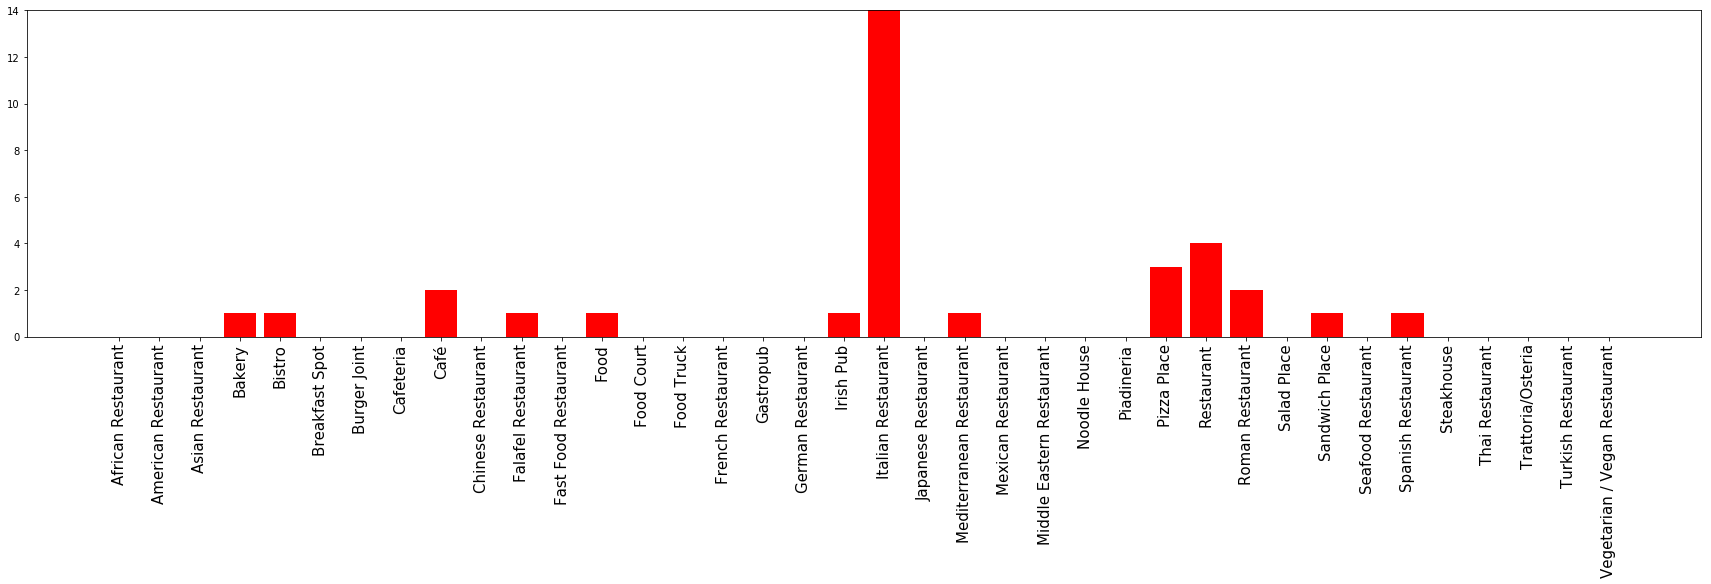

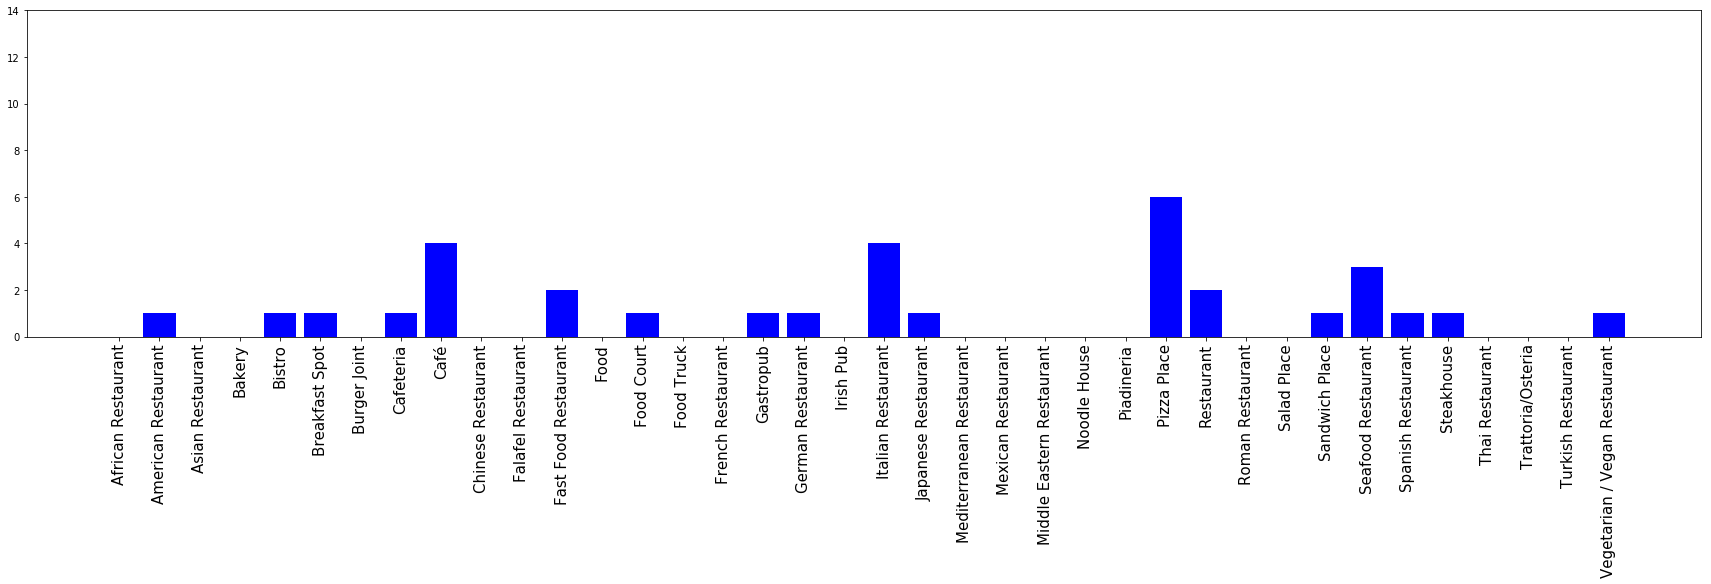

In [34]:
plot_bar_x(0,'red') #MUNICIPIO 1
plot_bar_x(1,'blue') #MUNICIPIO 10 

LOOK HOW MANY CATEGORIES THERE ARE IN EACH MUNICIPIO...

In [35]:
ROMA_FOOD.groupby('Neighborhood')['Venue Category'].count()

Neighborhood
MUNICIPIO 1     34
MUNICIPIO 10    33
MUNICIPIO 11     8
MUNICIPIO 12    17
MUNICIPIO 13    21
MUNICIPIO 14     4
MUNICIPIO 15     4
MUNICIPIO 2     10
MUNICIPIO 3     19
MUNICIPIO 4      5
MUNICIPIO 5      7
MUNICIPIO 6      4
MUNICIPIO 7     13
MUNICIPIO 8     14
MUNICIPIO 9      5
Name: Venue Category, dtype: int64

NOW IT IS IMPORTANT TO SET THE WEIGHT TO EACH KIND, BECAUSE MY FRIEND WANTS A FOCUS ON THE RESTAURANTS THAT HAVE MEAT IN THEIR MENU   

In [36]:
KindofRest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 38 columns):
African Restaurant               15 non-null int64
American Restaurant              15 non-null int64
Asian Restaurant                 15 non-null int64
Bakery                           15 non-null int64
Bistro                           15 non-null int64
Breakfast Spot                   15 non-null int64
Burger Joint                     15 non-null int64
Cafeteria                        15 non-null int64
Café                             15 non-null int64
Chinese Restaurant               15 non-null int64
Falafel Restaurant               15 non-null int64
Fast Food Restaurant             15 non-null int64
Food                             15 non-null int64
Food Court                       15 non-null int64
Food Truck                       15 non-null int64
French Restaurant                15 non-null int64
Gastropub                        15 non-null int64
German Restaurant             

In [37]:
toREMOVE=['Bakery','Breakfast Spot','Breakfast Spot','Café','Cafeteria','Chinese Restaurant','Falafel Restaurant',
          'Japanese Restaurant',
          'Salad Place','Seafood Restaurant',
          'Vegetarian / Vegan Restaurant']


IN THE 'toREMOVE' LABEL I PUT THE KIND OF RESTAURANTS THAT SHOULD NOT BE A DIRECT COMPETITOR 

In [38]:
ModelDatasetwithdrop=ModelDataset.drop(toREMOVE,axis=1)

In [39]:
ModelDatasetwithdrop.head(10)

Venue Category,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,Bistro,Burger Joint,Fast Food Restaurant,Food,Food Court,Food Truck,...,Piadineria,Pizza Place,Restaurant,Roman Restaurant,Sandwich Place,Spanish Restaurant,Steakhouse,Thai Restaurant,Trattoria/Osteria,Turkish Restaurant
0,MUNICIPIO 1,0,0,0,1,0,0,1,0,0,...,0,3,4,2,1,1,0,0,0,0
1,MUNICIPIO 10,0,1,0,1,0,2,0,1,0,...,0,6,2,0,1,1,1,0,0,0
2,MUNICIPIO 11,0,0,0,0,1,1,0,0,0,...,0,3,0,0,0,0,0,0,0,0
3,MUNICIPIO 12,0,0,0,0,0,0,1,0,0,...,0,5,2,0,1,0,1,1,0,0
4,MUNICIPIO 13,0,0,0,0,0,2,0,0,1,...,0,2,0,0,0,0,2,0,0,0
5,MUNICIPIO 14,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
6,MUNICIPIO 15,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
7,MUNICIPIO 2,0,0,0,0,0,0,0,0,0,...,1,2,2,0,0,0,0,0,0,0
8,MUNICIPIO 3,0,0,0,1,0,1,0,0,0,...,0,3,0,0,1,0,1,0,0,1
9,MUNICIPIO 4,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
KindofRest=['African Restaurant', 'American Restaurant',
       'Asian Restaurant', 'Bistro', 'Burger Joint', 
       'Fast Food Restaurant', 'Food', 'Food Court', 'Food Truck',
       'French Restaurant', 'Gastropub', 'German Restaurant', 'Irish Pub',
       'Italian Restaurant',  'Mediterranean Restaurant',
       'Mexican Restaurant', 'Middle Eastern Restaurant', 'Noodle House',
       'Piadineria', 'Pizza Place', 'Restaurant', 'Roman Restaurant',
       'Sandwich Place', 'Spanish Restaurant', 'Steakhouse', 'Thai Restaurant',
       'Trattoria/Osteria', 'Turkish Restaurant']

CALCULATE THE FREQUENCIES OF EACH TYPE OF RESTAURANT IN EACH NEIGHBOOR AND SUBSTRAT IT FROM 1, SO WE CAN CREATE A DATASET WITH 1=NO THIS RESTAURANT AND 0=A LOT OF THIS

In [43]:
for i in range(0,ModelDatasetwithdrop.shape[0]):
    total=ModelDatasetwithdrop.iloc[:,1:].iloc[0].sum()
    for j in KindofRest:
        ModelDatasetwithdrop[j].iloc[i]=1-(ModelDatasetwithdrop[j].iloc[i]/total)        

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
len(ModelDatasetwithdrop[KindofRest].columns)

28

In [50]:
ModelDatasetwithdrop[KindofRest].columns

Index(['African Restaurant', 'American Restaurant', 'Asian Restaurant',
       'Bistro', 'Burger Joint', 'Fast Food Restaurant', 'Food', 'Food Court',
       'Food Truck', 'French Restaurant', 'Gastropub', 'German Restaurant',
       'Irish Pub', 'Italian Restaurant', 'Mediterranean Restaurant',
       'Mexican Restaurant', 'Middle Eastern Restaurant', 'Noodle House',
       'Piadineria', 'Pizza Place', 'Restaurant', 'Roman Restaurant',
       'Sandwich Place', 'Spanish Restaurant', 'Steakhouse', 'Thai Restaurant',
       'Trattoria/Osteria', 'Turkish Restaurant'],
      dtype='object', name='Venue Category')

In [45]:
from scipy.spatial.distance import cosine

In [49]:
Opinion=np.zeros(28)

WHAT KIND OF RESTAURANT YOU WOULD OPEN?....

In [52]:
Opinion[0]=0 
Opinion[1]=1 
Opinion[2]=0   
Opinion[3]=1
Opinion[4]=0
Opinion[5]=0
Opinion[6]=0
Opinion[7]=0
Opinion[8]=0
Opinion[9]=0
Opinion[10]=1
Opinion[11]=0
Opinion[12]=0
Opinion[13]=0
Opinion[14]=0
Opinion[15]=0
Opinion[16]=0
Opinion[17]=0
Opinion[18]=0
Opinion[19]=0
Opinion[20]=0
Opinion[21]=0
Opinion[22]=0
Opinion[23]=0
Opinion[24]=1
Opinion[25]=0
Opinion[26]=0
Opinion[27]=0

PUT ALL TOGHETER COSINE SIMILARITY+WEIGHT OF PRICE (1-PRICE/MAX PRICE)+ WEIGHT OF DISTANCE (1-DISTANCE/MAX DISTANCE)

In [53]:
ROMA2=ROMA.set_index('NEIGHBORHOOD')

In [54]:
ModelDatasetwithdrop=ModelDatasetwithdrop.join(ROMA2,on='Neighborhood')

In [56]:
for i in range(0,ModelDatasetwithdrop[KindofRest].shape[0]):
    c=cosine(Opinion,ModelDatasetwithdrop[KindofRest].iloc[i])
    weightprice=1-(ModelDatasetwithdrop['MQPRICE'].iloc[i]/ModelDatasetwithdrop['MQPRICE'].max())
    distance=1-(ModelDatasetwithdrop['DISTANCE'].iloc[i]/ModelDatasetwithdrop['DISTANCE'].max())    
    print(ModelDatasetwithdrop['Neighborhood'][i],":",round((c+weightprice+distance)*100))

MUNICIPIO 1 : 162.0
MUNICIPIO 10 : 119.0
MUNICIPIO 11 : 197.0
MUNICIPIO 12 : 196.0
MUNICIPIO 13 : 191.0
MUNICIPIO 14 : 179.0
MUNICIPIO 15 : 177.0
MUNICIPIO 2 : 172.0
MUNICIPIO 3 : 180.0
MUNICIPIO 4 : 167.0
MUNICIPIO 5 : 175.0
MUNICIPIO 6 : 163.0
MUNICIPIO 7 : 196.0
MUNICIPIO 8 : 182.0
MUNICIPIO 9 : 179.0


SO IF YOU WANT TO OPEN A STEAKHOUSE AND YOU WANT TO KNOW THE BEST PLACE SET ONLY THE INDEX 26=1 A LOOK THE RESULT

In [57]:
Opinion=np.zeros(28)
Opinion[24]=1

In [61]:
for i in range(0,ModelDatasetwithdrop[KindofRest].shape[0]):
    c=cosine(Opinion,ModelDatasetwithdrop[KindofRest].iloc[i])
    weightprice=1-(ModelDatasetwithdrop['MQPRICE'].iloc[i]/ModelDatasetwithdrop['MQPRICE'].max())
    distance=1-(ModelDatasetwithdrop['DISTANCE'].iloc[i]/ModelDatasetwithdrop['DISTANCE'].max())    
    print(ModelDatasetwithdrop['Neighborhood'][i],":",round((c+weightprice+distance)*100,2))

MUNICIPIO 1 : 180.41
MUNICIPIO 10 : 137.8
MUNICIPIO 11 : 216.17
MUNICIPIO 12 : 215.94
MUNICIPIO 13 : 210.17
MUNICIPIO 14 : 198.33
MUNICIPIO 15 : 196.34
MUNICIPIO 2 : 190.75
MUNICIPIO 3 : 198.78
MUNICIPIO 4 : 185.84
MUNICIPIO 5 : 193.66
MUNICIPIO 6 : 181.75
MUNICIPIO 7 : 214.34
MUNICIPIO 8 : 201.09
MUNICIPIO 9 : 197.88


ACCORDING TO THIS OPEN YOUR RESTAURANT IN THE 11TH MUNICIPIO!!